In [1]:
import pandas as pd 
import os

folders = ['q1', 'q2', 'q3', 'q4']

dfs = []

for folder in folders:
    folder_path = os.path.join('D:\ML\Project\Option_Predictor\Data', folder) 
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, sep=',')  
        filtered_df = df[df[' [DTE]'] == 7]
        dfs.append(filtered_df)

merged_filtered_df = pd.concat(dfs, ignore_index=True)

C:\Users\tusha\AppData\Local\Temp\ipykernel_33140\2942204563.py:12: DtypeWarning: Columns (8,9,10,11,12,15,17,18,20,21,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=',')
C:\Users\tusha\AppData\Local\Temp\ipykernel_33140\2942204563.py:12: DtypeWarning: Columns (8,9,10,11,12,15,17,18,20,21,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=',')


In [2]:
merged_filtered_df.head()

,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],...,[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT]
0,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.0,0.0,0.00176,-0.01785,-0.00023,2.560080,,2853.4,0.740
1,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,-0.00041,0.0,0.0016,-0.01773,-0.00054,2.220070,,2653.4,0.689
2,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.0,0.0,0.00168,-0.01682,0.0,1.933810,,2453.4,0.637
3,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,0.0,0.0,0.00226,-0.01734,-0.00055,1.687580,,2253.4,0.585
4,1672866000,2023-01-04 16:00,2023-01-04,16.0,3853.39,2023-01-11,1673470800,7.0,1.0,0.0,...,0.0,-0.00035,0.0,0.00232,-0.01689,-0.00016,1.469090,,2053.4,0.533


In [3]:
merged_filtered_df[' [QUOTE_DATE]'] = pd.to_datetime(merged_filtered_df[' [QUOTE_DATE]'])
start_date = merged_filtered_df[' [QUOTE_DATE]'].min()
end_date = merged_filtered_df[' [QUOTE_DATE]'].max()
print("Start Date: ", start_date, "End Date: ", end_date)

Start Date:  2023-01-04 00:00:00 End Date:  2023-12-29 00:00:00


In [4]:
merged_filtered_df.isnull().sum()

[QUOTE_UNIXTIME]          0
 [QUOTE_READTIME]         0
 [QUOTE_DATE]             0
 [QUOTE_TIME_HOURS]       0
 [UNDERLYING_LAST]        0
 [EXPIRE_DATE]            0
 [EXPIRE_UNIX]            0
 [DTE]                    0
 [C_DELTA]                0
 [C_GAMMA]                0
 [C_VEGA]                 0
 [C_THETA]                0
 [C_RHO]                  0
 [C_IV]                   0
 [C_VOLUME]               0
 [C_LAST]                 0
 [C_SIZE]                 0
 [C_BID]                  0
 [C_ASK]                  0
 [STRIKE]                 0
 [P_BID]                  0
 [P_ASK]                  0
 [P_SIZE]                 0
 [P_LAST]                 0
 [P_DELTA]                0
 [P_GAMMA]                0
 [P_VEGA]                 0
 [P_THETA]                0
 [P_RHO]                  0
 [P_IV]                   0
 [P_VOLUME]               0
 [STRIKE_DISTANCE]        0
 [STRIKE_DISTANCE_PCT]    0
dtype: int64

In [5]:
!pip install pandas_datareader

In [6]:
df = merged_filtered_df

import pandas_datareader.data as web
risk_free_rate_data = web.DataReader('DTB3', 'fred', start_date, end_date)

risk_free_rate_data.index = pd.to_datetime(risk_free_rate_data.index)

df[' [QUOTE_DATE]'] = pd.to_datetime(df[' [QUOTE_DATE]'])

df = df.merge(risk_free_rate_data, how='left', left_on=' [QUOTE_DATE]', right_index=True)

df['DTB3'] = df['DTB3'].fillna(method='bfill')

C:\Users\tusha\AppData\Local\Temp\ipykernel_33140\4189611244.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['DTB3'] = df['DTB3'].fillna(method='bfill')


In [7]:
!pip install yfinance

In [8]:
import yfinance as yf

spx = yf.Ticker("^SPX")
hist = spx.history(start=start_date, end=end_date)

hist.rename(columns={'Close': 'Spot_Price'}, inplace=True)

hist = hist.reset_index()

hist['Date'] = hist['Date'].dt.tz_localize(None)

df_merged = pd.merge(df, hist[['Date', 'Spot_Price']], left_on=' [QUOTE_DATE]', right_on='Date', how='left')

df_merged.drop(columns=['Date'], inplace=True)

In [9]:
df_merged.isnull().sum()

[QUOTE_UNIXTIME]            0
 [QUOTE_READTIME]           0
 [QUOTE_DATE]               0
 [QUOTE_TIME_HOURS]         0
 [UNDERLYING_LAST]          0
 [EXPIRE_DATE]              0
 [EXPIRE_UNIX]              0
 [DTE]                      0
 [C_DELTA]                  0
 [C_GAMMA]                  0
 [C_VEGA]                   0
 [C_THETA]                  0
 [C_RHO]                    0
 [C_IV]                     0
 [C_VOLUME]                 0
 [C_LAST]                   0
 [C_SIZE]                   0
 [C_BID]                    0
 [C_ASK]                    0
 [STRIKE]                   0
 [P_BID]                    0
 [P_ASK]                    0
 [P_SIZE]                   0
 [P_LAST]                   0
 [P_DELTA]                  0
 [P_GAMMA]                  0
 [P_VEGA]                   0
 [P_THETA]                  0
 [P_RHO]                    0
 [P_IV]                     0
 [P_VOLUME]                 0
 [STRIKE_DISTANCE]          0
 [STRIKE_DISTANCE_PCT]      0
DTB3      

In [10]:
column_name = 'Spot_Price' 
df_cleaned = df_merged.dropna(subset=[column_name])

In [11]:

rename_dict = {col: col.replace('[', '').replace(']', '').strip() for col in df.columns}
df_cleaned.rename(columns=rename_dict, inplace=True)

print(df_cleaned.columns)

Index(['QUOTE_UNIXTIME', 'QUOTE_READTIME', 'QUOTE_DATE', 'QUOTE_TIME_HOURS',
       'UNDERLYING_LAST', 'EXPIRE_DATE', 'EXPIRE_UNIX', 'DTE', 'C_DELTA',
       'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'C_VOLUME', 'C_LAST',
       'C_SIZE', 'C_BID', 'C_ASK', 'STRIKE', 'P_BID', 'P_ASK', 'P_SIZE',
       'P_LAST', 'P_DELTA', 'P_GAMMA', 'P_VEGA', 'P_THETA', 'P_RHO', 'P_IV',
       'P_VOLUME', 'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT', 'DTB3',
       'Spot_Price'],
      dtype='object')


C:\Users\tusha\AppData\Local\Temp\ipykernel_33140\2939941857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns=rename_dict, inplace=True)


In [12]:
columns_to_keep = [
    'Spot_Price',  
    'STRIKE',  
    'DTE',  
    'DTB3',  
    'C_IV',  
    'C_DELTA',  
    'C_GAMMA',  
    'C_VEGA', 
    'C_THETA', 
    'C_RHO',  
    'C_LAST', 
    'C_BID',  
    'C_ASK',
    'QUOTE_DATE',
    'EXPIRE_DATE' 
]
df_filtered = df_cleaned[columns_to_keep]

In [13]:
from scipy.stats import norm
import numpy as np

df_filtered['Spot_Price'] = pd.to_numeric(df_filtered['Spot_Price'], errors='coerce')
df_filtered['STRIKE'] = pd.to_numeric(df_filtered['STRIKE'], errors='coerce')
df_filtered['DTE'] = pd.to_numeric(df_filtered['DTE'], errors='coerce')
df_filtered['DTB3'] = pd.to_numeric(df_filtered['DTB3'], errors='coerce')
df_filtered['C_IV'] = pd.to_numeric(df_filtered['C_IV'], errors='coerce')

def black_scholes_call(S, K, T, r, sigma):
    """Calculate the Black-Scholes option price for a call option."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    option_price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return option_price

df_filtered['BS_Call_Price'] = df_filtered.apply(
    lambda row: black_scholes_call(
        S=row['Spot_Price'], 
        K=row['STRIKE'], 
        T=row['DTE']/365, 
        r=row['DTB3']/100, 
        sigma=row['C_IV']
    ), axis=1
)

C:\Users\tusha\AppData\Local\Temp\ipykernel_33140\2321411931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Spot_Price'] = pd.to_numeric(df_filtered['Spot_Price'], errors='coerce')
C:\Users\tusha\AppData\Local\Temp\ipykernel_33140\2321411931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['STRIKE'] = pd.to_numeric(df_filtered['STRIKE'], errors='coerce')
C:\Users\tusha\AppData\Local\Temp\ipykernel_33140\2321411931.py:6: SettingWithCopyWarning: 
A value is trying to be set on

In [14]:
df_filtered.isnull().sum()

Spot_Price          0
STRIKE              0
DTE                 0
DTB3                0
C_IV             2060
C_DELTA             0
C_GAMMA             0
C_VEGA              0
C_THETA             0
C_RHO               0
C_LAST              0
C_BID               0
C_ASK               0
QUOTE_DATE          0
EXPIRE_DATE         0
BS_Call_Price    2060
dtype: int64

In [15]:
df_filtered = df_filtered.dropna(subset=['C_IV'])

df_filtered = df_filtered.dropna(subset=['BS_Call_Price'])

In [16]:
df_filtered.to_csv('D:/ML/Project/Option_Predictor/filtered_dataset.csv', index=False)

In [18]:
data = pd.read_csv('D:/ML/Project/Option_Predictor/filtered_dataset.csv')

filtered_data = data[data['C_LAST'] != 0]

In [19]:
print(f"Original Dataset Shape: {df_filtered.shape}")
print(f"Filtered Dataset Shape: {filtered_data.shape}")

Original Dataset Shape: (37110, 16)
Filtered Dataset Shape: (25424, 16)


In [20]:
start_date = filtered_data['QUOTE_DATE'].min()
end_date = filtered_data['QUOTE_DATE'].max()

vix = yf.Ticker("^VIX")
hist = vix.history(start=start_date, end=end_date)
hist.rename(columns={'Close': 'VIX'}, inplace=True)

hist = hist.reset_index()

hist['Date'] = hist['Date'].dt.tz_localize(None)

filtered_data['QUOTE_DATE'] = pd.to_datetime(filtered_data['QUOTE_DATE'])

df_merged = pd.merge(filtered_data, hist[['Date', 'VIX']], left_on='QUOTE_DATE', right_on='Date', how='left')
df_merged.drop(columns=['Date'], inplace=True)

C:\Users\tusha\AppData\Local\Temp\ipykernel_33140\206041803.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['QUOTE_DATE'] = pd.to_datetime(filtered_data['QUOTE_DATE'])


In [21]:
df_merged.isnull().sum()

Spot_Price         0
STRIKE             0
DTE                0
DTB3               0
C_IV               0
C_DELTA            0
C_GAMMA            0
C_VEGA             0
C_THETA            0
C_RHO              0
C_LAST             0
C_BID              0
C_ASK              0
QUOTE_DATE         0
EXPIRE_DATE        0
BS_Call_Price      0
VIX              112
dtype: int64

In [22]:
df = df_merged.dropna(subset=['VIX'])

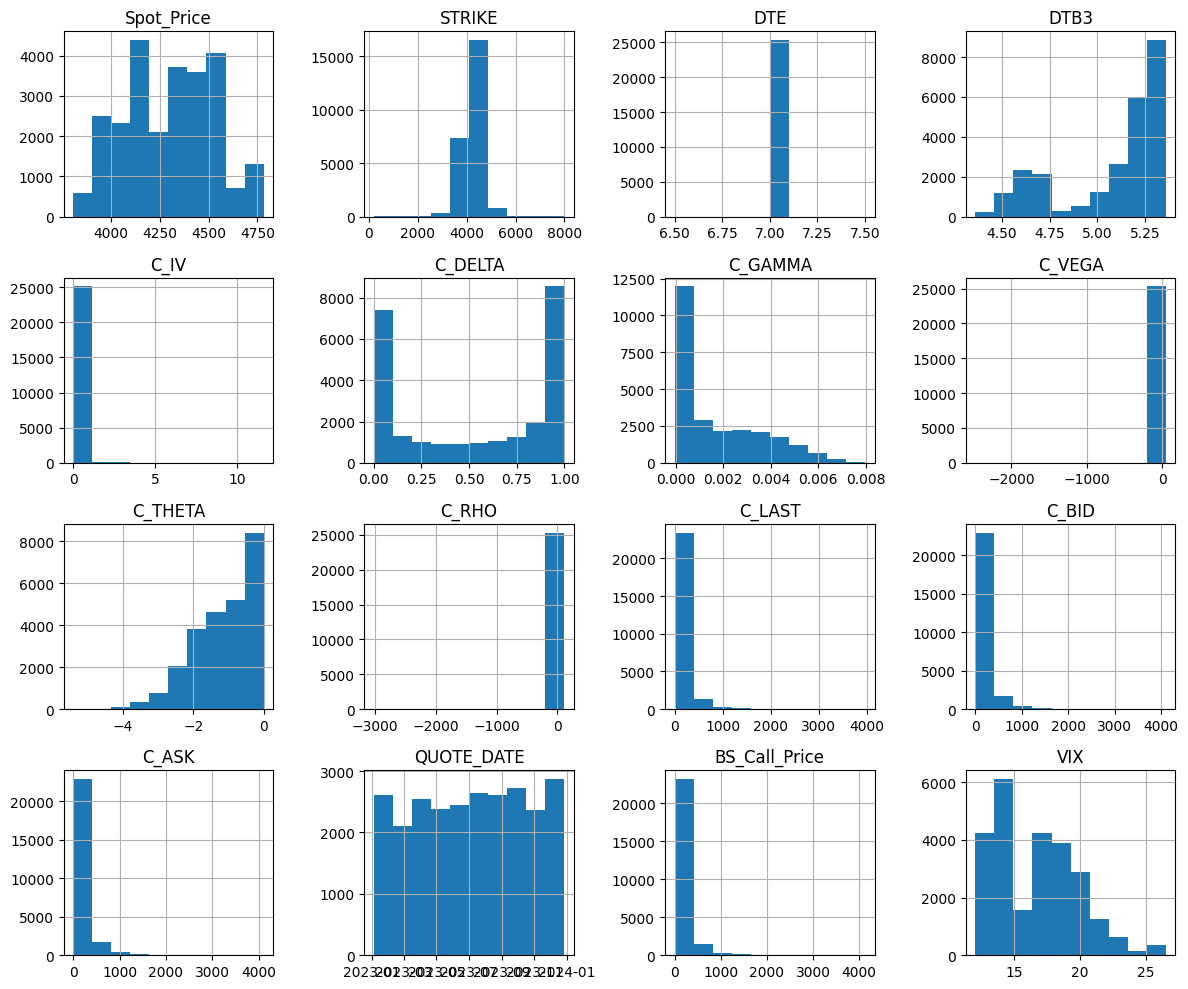

In [23]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [24]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.8 MB/s eta 0:00:54
   ---------------------------------------- 0.8/150.0 MB 2.6 MB/s eta 0:00:58
   ---------------------------------------- 1.3/150.0 MB 2.2 MB/s eta 0:01:07
   ---------------------------------------- 1.8/150.0 MB 2.2 MB/s eta 0:01:07
    --------------------------------------- 2.4/150.0 MB 2.3 MB/s eta 0:01:05
    --------------------------------------- 2.9/150.0 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 3.7/150.0 MB 2.7 MB/s eta 0:00:55
   - -------------------------------------- 4.2/150.0 MB 2.6 MB/s eta 0:00:56
   - -------------------------------------- 5.0/150.0 MB 2.7 MB/s eta 0:00:54
   - -------------------------------------- 5.5/150.0 MB 2.6 MB/s eta 0:00:55
   - -------------------------------------- 6.3/150.0 MB 2.8 MB/s eta 0:00:53
   - -------------------------------------- 7.1/150.0 MB 2.9 MB/s eta 0

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

df = filtered_data

exclude_columns = ['C_LAST', 'DTE', 'QUOTE_DATE', 'EXPIRE_DATE', 'C_THETA'] 
feature_columns = df.columns.difference(exclude_columns)

X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df['C_LAST'], test_size=0.2, random_state=42)


skew_columns = ['C_IV', 'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_RHO'] 
for col in skew_columns:
    min_positive = X_train[col][X_train[col] > 0].min()
    X_train[col] = X_train[col].replace(0, min_positive * 0.1)
    X_train[col] = X_train[col].apply(lambda x: min_positive * 0.1 if x <= 0 else x)
    X_train[col + '_log'] = np.log(X_train[col])
    X_test[col] = X_test[col].replace(0, min_positive * 0.1)
    X_test[col] = X_test[col].apply(lambda x: min_positive * 0.1 if x <= 0 else x)
    X_test[col + '_log'] = np.log(X_test[col])
    X_train.drop(col, axis=1, inplace=True)
    X_test.drop(col, axis=1, inplace=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))  # Scale only numeric columns
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse:.4f}")
    print(f"{name} R-Squared: {r2:.4f}")

Linear Regression Mean Squared Error: 4755.1815
Linear Regression R-Squared: 0.9515
Random Forest Mean Squared Error: 3791.8434
Random Forest R-Squared: 0.9613
Gradient Boosting Mean Squared Error: 3547.0426
Gradient Boosting R-Squared: 0.9638
XGBoost Mean Squared Error: 3684.9653
XGBoost R-Squared: 0.9624


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

cross_val_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse:.4f}")
    print(f"{name} R-Squared: {r2:.4f}")

    mse_scores = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cross_val_results[name] = mse_scores
    print(f"Cross-validated MSE for {name}: {mse_scores.mean():.4f} (+/- {mse_scores.std():.4f})\n")

Linear Regression Mean Squared Error: 4755.1815
Linear Regression R-Squared: 0.9515
Cross-validated MSE for Linear Regression: 4229.4216 (+/- 326.8605)

Random Forest Mean Squared Error: 3791.8434
Random Forest R-Squared: 0.9613
Cross-validated MSE for Random Forest: 3380.9485 (+/- 308.6281)

Gradient Boosting Mean Squared Error: 3547.0426
Gradient Boosting R-Squared: 0.9638
Cross-validated MSE for Gradient Boosting: 3328.9019 (+/- 272.9155)

XGBoost Mean Squared Error: 3684.9653
XGBoost R-Squared: 0.9624
Cross-validated MSE for XGBoost: 3741.4048 (+/- 203.2554)



In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Lasso Regression": Lasso(alpha=0.1, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=4, min_samples_split=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, max_depth=6, min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()

    results[name] = {
        'Test MSE': mse,
        'Test R2': r2,
        'CV Mean MSE': mean_mse,
        'CV Std MSE': std_mse
    }

    print(f"{name} Test MSE: {mse:.4f}, Test R2: {r2:.4f}")
    print(f"{name} CV Mean MSE: {mean_mse:.4f}, CV Std MSE: {std_mse:.4f}")

c:\Users\tusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.337e+05, tolerance: 1.328e+05
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Test MSE: 4783.4555, Test R2: 0.9512
Lasso Regression CV Mean MSE: 4255.5128, CV Std MSE: 330.7187
Random Forest Test MSE: 3484.3359, Test R2: 0.9645
Random Forest CV Mean MSE: 3319.7264, CV Std MSE: 319.1091
